In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 11.0 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=46d89f4a73d422fa7758f717d18c7ed85c262fbd6cc9a963a90f023ac55b8c2b
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as scs

In [ ]:
tickers = ["AAPL", "FB", "C", "DIS","F","MSFT","MS","GM","TSLA","AMZN"]
weights = np.array([.1,.1,.1,.1,.1,.1,.1,.1,.1,.1])

In [ ]:
start = dt.datetime(2019,1,1)
end = dt.datetime.now()

df = yf.download(ticker, start, end)["Adj Close"]
df.head()

[*********************100%***********************]  1 of 1 completed


Date
2021-08-04    12.40
2021-08-05    12.98
2021-08-06    12.87
2021-08-09    12.81
2021-08-10    12.87
Name: Adj Close, dtype: float64

In [ ]:
returns = df.pct_change()
returns.head()

Date
2019-01-02         NaN
2019-01-03    0.009449
2019-01-04    0.030421
2019-01-07    0.004542
2019-01-08    0.010550
Name: Adj Close, dtype: float64

In [ ]:
cov_matrix = returns.cov()
cov_matrix

In [ ]:
avg_returns = returns.mean()
avg_returns

In [ ]:
count = returns.count()[0]
count 

611

In [ ]:
port_mean = avg_returns @ weights
port_std = np.sqrt(weights.T @ cov_matrix @ weights)
port_mean, port_std

(0.0019172259360254375, 0.019343989766404175)

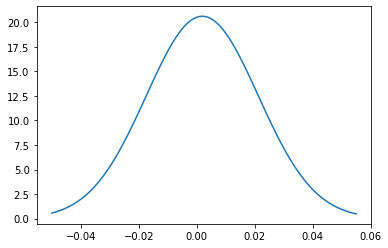

In [ ]:
x = np.arange(-0.05, 0.055, 0.001)
norm_dist = norm.pdf(x,port_mean,port_std)
norm_dist
plt.plot(x, norm_dist)

In [ ]:
confidence_level = 0.05

VaR = norm.ppf(confidence_level, port_mean, port_std)
VaR

-0.029900805790956643

In [ ]:
h = 5

VaR * np.sqrt(h)

-0.06706343120437704

In [ ]:
lower = port_mean - 2 * port_std/np.sqrt(count)
higher = port_mean + 2 * port_std/np.sqrt(count)

lower, higher

(0.000325974481222498, 0.0034711031663958282)

In [ ]:
n_sims = 1000000
rfr = 0
time = 30 #days
vol = 0.25
S0 = 1

In [ ]:
d = (rfr-0.5*vol**2) * (time/252)
a = vol* np.sqrt(time/252)
r = np.random.normal(0,1,(n_sims,1))

GBM_returns = S0 * np.exp(d + a*r)

In [ ]:
pers =[0.01, 0.1, 1, 2.5, 5, 10]
var = scs.scoreatpercentile(GBM_returns - 1, pers)

In [ ]:
df = pd.DataFrame(var, pers, columns = ["VaR"])

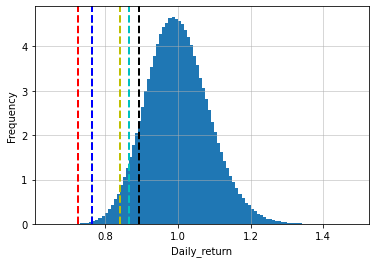

In [ ]:
plt.hist(GBM_returns, density = True, bins = 100)

plt.axvline(df.loc[0.01]["VaR"] + 1, color = "r", linestyle = "dashed", linewidth = 2)
plt.axvline(df.loc[0.1]["VaR"] + 1, color = "g", linestyle = "dashed", linewidth = 2)
plt.axvline(df.loc[0.1]["VaR"] + 1, color = "b", linestyle = "dashed", linewidth = 2)
plt.axvline(df.loc[2.5]["VaR"] + 1, color = "y", linestyle = "dashed", linewidth = 2)
plt.axvline(df.loc[5]["VaR"] + 1, color = "c", linestyle = "dashed", linewidth = 2)
plt.axvline(df.loc[10]["VaR"] + 1, color = "k", linestyle = "dashed", linewidth = 2)

plt.ylabel("Frequency")
plt.xlabel("Daily_return")
plt.grid(True, linewidth = 0.5)

plt.show()